<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [58]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [59]:
from bs4 import BeautifulSoup
import requests

##### Your Code Here #####
#raise Exception("\nThis task is not complete. \nReplace this line with your code for the task.")

import pandas as pd

df = pd.read_csv('./data/job_listings.csv')


In [60]:
def clean_description(desc):
    soup = BeautifulSoup(desc)
    return soup.get_text()

df['clean_desc'] = df['description'].apply(clean_description)
df.head()

,Unnamed: 0,description,title,clean_desc
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,"b""Job Requirements:\nConceptual understanding ..."
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"b'Job Description\n\nAs a Data Scientist 1, yo..."
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,b'As a Data Scientist you will be working on c...
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"b'$4,969 - $6,756 a monthContractUnder the gen..."
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,b'Location: USA \xe2\x80\x93 multiple location...


In [61]:
df['title'].value_counts()

Data Scientist                                150
Senior Data Scientist                          14
Junior Data Scientist                          10
Associate Data Scientist                        8
Data Scientist Intern                           7
                                             ... 
Data Scientist - Delphi                         1
Data Scientist – Personalization                1
A &A Division /Data Scientist                   1
Data Scientist, Clients                         1
Senior Business Intelligence Data Engineer      1
Name: title, Length: 177, dtype: int64

In [62]:
soup = BeautifulSoup(df['clean_desc'][1], 'html.parser')

In [63]:
print(soup)

b'Job Description\n\nAs a Data Scientist 1, you will help us build machine learning models, data pipelines, and micro-services to help our clients navigate their healthcare journey. You will do so by empowering and improving the next generation of Accolade Applications and user experiences.\nA day in the life\xe2\x80\xa6\nWork with a small agile team to design and develop mobile applications in an iterative fashion.\nWork with a tight-knit group of development team members in Seattle.\nContribute to best practices and help guide the future of our applications.\nOperates effectively as a collaborative member of the development team.\nOperates effectively as an individual for quick turnaround of enhancements and fixes.\nResponsible for meeting expectations and deliverables on time with high quality.\nDrive and implement new features within our mobile applications.\nPerform thorough manual testing and writing test cases that cover all areas.\nIdentify new development tools/approaches that

In [64]:
# print human readable
print(soup.get_text().encode().decode('unicode_escape'))

b'Job Description

As a Data Scientist 1, you will help us build machine learning models, data pipelines, and micro-services to help our clients navigate their healthcare journey. You will do so by empowering and improving the next generation of Accolade Applications and user experiences.
A day in the lifeâ¦
Work with a small agile team to design and develop mobile applications in an iterative fashion.
Work with a tight-knit group of development team members in Seattle.
Contribute to best practices and help guide the future of our applications.
Operates effectively as a collaborative member of the development team.
Operates effectively as an individual for quick turnaround of enhancements and fixes.
Responsible for meeting expectations and deliverables on time with high quality.
Drive and implement new features within our mobile applications.
Perform thorough manual testing and writing test cases that cover all areas.
Identify new development tools/approaches that will increase code q

In [65]:
# removing special characters
descriptions = []
for description in df['clean_desc']:
    clean = BeautifulSoup(description, 'html.parser')
    cle = clean.get_text().replace("\\n", ' ').replace('\\xe2\\x80\\xa6', "").replace('\\xe2\\x80\\x99', "").replace('\\\'', '').replace('/', ' ').replace('\\xe2\\x80\\x93', '')
    descriptions.append(cle[2:-1])
print(descriptions[1])

Job Description  As a Data Scientist 1, you will help us build machine learning models, data pipelines, and micro-services to help our clients navigate their healthcare journey. You will do so by empowering and improving the next generation of Accolade Applications and user experiences. A day in the life Work with a small agile team to design and develop mobile applications in an iterative fashion. Work with a tight-knit group of development team members in Seattle. Contribute to best practices and help guide the future of our applications. Operates effectively as a collaborative member of the development team. Operates effectively as an individual for quick turnaround of enhancements and fixes. Responsible for meeting expectations and deliverables on time with high quality. Drive and implement new features within our mobile applications. Perform thorough manual testing and writing test cases that cover all areas. Identify new development tools approaches that will increase code qualit

In [66]:
df['clean_desc_parsed'] = descriptions
df.head(5)

,Unnamed: 0,description,title,clean_desc,clean_desc_parsed
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,"b""Job Requirements:\nConceptual understanding ...",Job Requirements: Conceptual understanding in ...
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"b'Job Description\n\nAs a Data Scientist 1, yo...","Job Description As a Data Scientist 1, you wi..."
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,b'As a Data Scientist you will be working on c...,As a Data Scientist you will be working on con...
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"b'$4,969 - $6,756 a monthContractUnder the gen...","$4,969 - $6,756 a monthContractUnder the gener..."
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,b'Location: USA \xe2\x80\x93 multiple location...,Location: USA multiple locations 2+ years of ...


## 2) Use Spacy to tokenize the listings 

In [67]:
##### Your Code Here #####
#raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

# Tokenizer Pipe
tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(df['clean_desc_parsed'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

df['clean_desc_parsed_token'] = tokens
df['clean_desc_parsed_token'].head()

0    [Job, Requirements:, Conceptual, understanding...
1    [Job, Description,  , As, a, Data, Scientist, ...
2    [As, a, Data, Scientist, you, will, be, workin...
3    [$4,969, -, $6,756, a, monthContractUnder, the...
4    [Location:, USA,  , multiple, locations, 2+, y...
Name: clean_desc_parsed_token, dtype: object

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [68]:
##### Your Code Here #####
#raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words='english', max_features=1000)

#Learn our Vocab
vect.fit()


# Get sparse dtm
dtm = vect.transform(df['clean_desc_parsed_token'])

dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

# need function or foor loop? how to fit a df inside a df

TypeError: fit() missing 1 required positional argument: 'raw_documents'

In [74]:
# testing
vect = CountVectorizer()

text = df['clean_desc_parsed_token'][0]
vect.fit(text)
    
dtm = vect.transform(text)
print(dtm)

  (0, 28)	1
  (1, 60)	1
  (2, 9)	1
  (3, 73)	1
  (4, 36)	1
  (5, 31)	1
  (6, 44)	1
  (7, 33)	1
  (8, 45)	1
  (8, 76)	1
  (8, 77)	1
  (9, 4)	1
  (10, 42)	1
  (11, 69)	1
  (12, 2)	1
  (13, 34)	1
  (14, 35)	1
  (15, 59)	1
  (16, 46)	1
  (17, 58)	1
  (18, 20)	1
  (19, 10)	1
  (20, 72)	1
  (21, 47)	1
  (22, 24)	1
  :	:
  (58, 70)	1
  (59, 67)	1
  (60, 26)	1
  (61, 24)	1
  (62, 15)	1
  (63, 66)	1
  (64, 25)	1
  (65, 63)	1
  (66, 54)	1
  (67, 30)	1
  (68, 53)	1
  (69, 74)	1
  (70, 23)	1
  (71, 29)	1
  (72, 55)	1
  (73, 3)	1
  (74, 39)	1
  (75, 11)	1
  (76, 68)	1
  (77, 40)	1
  (78, 8)	1
  (79, 57)	1
  (80, 65)	1
  (81, 18)	1
  (82, 1)	1


## 4) Visualize the most common word counts

In [69]:
##### Your Code Here #####
#raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

nlp = spacy.load("en_core_web_lg")
STOP_WORDS = nlp.Defaults.stop_words.union([' , ',' ', '  ', 's', 'data', 'science', 'scientist'])


tokens = []
tokenizer = spacy.tokenizer.Tokenizer(nlp.vocab)
""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(df['clean_desc_parsed']):
    
    doc_tokens = []
    
    for token in doc:
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

df['clean_desc_parsed_token'] = tokens
df['clean_desc_parsed_token'].head()

0    [job, requirements:, conceptual, understanding...
1    [job, description, 1,, help, build, machine, l...
2    [working, consulting, business., responsible, ...
3    [$4,969, -, $6,756, monthcontractunder, genera...
4    [location:, usa, multiple, locations, 2+, year...
Name: clean_desc_parsed_token, dtype: object

In [70]:
def count(docs):

    word_counts = Counter()
    appears_in = Counter()

    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['pct_total'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [71]:
import squarify
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
df['clean_desc_parsed_token'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('experience', 1681),
 ('work', 1073),
 ('business', 1071),
 ('team', 787),
 ('learning', 691),
 ('machine', 687),
 ('analytics', 567),
 ('statistical', 556),
 ('new', 520),
 ('ability', 503)]

In [72]:
wc = count(df['clean_desc_parsed_token'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
11,experience,402,1681,1.0,0.013003,0.013003,0.943662
10,work,354,1073,2.0,0.008300,0.021304,0.830986
147,business,304,1071,3.0,0.008285,0.029588,0.713615
308,team,325,787,4.0,0.006088,0.035676,0.762911
31,learning,271,691,5.0,0.005345,0.041021,0.636150


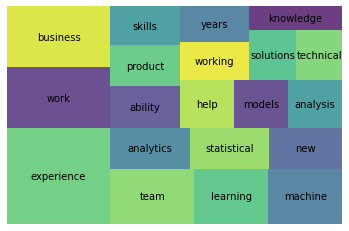

In [73]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [77]:
tfidf = TfidfVectorizer(stop_words='english',
                        ngram_range=(1,3),
                        max_df=.97,
                        min_df=5,
                        )

# Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(df['clean_desc_parsed']) # Similiar to fit_predict

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,000,000 employees,10,10 years,10 years experience,100,100 000,100 companies,100 companies corner,100 countries,...,york city,youll,youll develop,youll doing,youll need,youll work,youre,youre data,youre looking,youve
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [78]:
##### Your Code Here #####
#raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [87]:
df['clean_desc_parsed'][34]
job = ['''Every day, our passionate employees connect our customers to the world and everything in it  its why we exist at Shaw, and its why we strive to be the place where the best people choose to work. Our people reflect the richness of our communities, and our culture is inclusive of each individuals diverse background and perspective, which makes us a stronger team.  At Shaw we believe a diverse workforce fosters diversity of thought and perspective, and more diversity means more solutions. We invite all qualified individuals to apply.  This position reports to Dan Lavender  Career Opportunity : Data Scientist  Shaw Communications Inc. has an exciting opportunity in the Consumer Deep Insights team for a data scientist. Reporting to the Director of Consumer Deep Insights, the successful candidate will design and build analytics solutions and products to deliver superior business outcomes, across all aspects of the business. Exceptional candidates will also show an analytical curiosity, going beyond the immediate requirements of the project to find deep insights that others have missed.  Responsibilities  Identify and plan analytics use cases with business owners Apply cutting edge analytics to generate new business insights across all business functions Develop and deploy analytical solutions across a variety of business functions, including, but not limited to: customer acquisition, customer retention, product development, pricing decisions, network roll-out Track and improve performance of analytical solutions developed Communicate findings to wider audiences within Shaw Communications Stay current on cutting edge Data Science applications, tools and approaches  Required Skills and Qualifications  Significant relevant experience building and deploying advanced analytics solutions in telco, cable or B2C environment. Relevant topics include: customer acquisition, customer segmentation and targeting, customer LTV maximization, churn prevention, cost modeling of transportation & logistics operations, predictive maintenance Advanced degree preferred: Masters degree with 3-5 years experience or undergraduate degree with 6+ years experience. The degree should be in computer science, applied mathematics, statistics, machine learning, or a related data centric field. Deep technical and data science expertise, including experience in the following:  o Analytical methods: statistical modeling (e.g., linear regression, GLMs, time series), supervised machine learning (e.g., random forests, neural networks, boosting), design of experiments, segmentation clustering, text mining, network analysis (e.g., location allocation), optimization, simulation o Analytics tools: Data wrangling (SQL, R, Python, PostGRESql, Spark, Hadoop Hive), Data Modeling (R, Python, SAS, RapidMiner, SPSS), Data visualization (Tableau, Microstrategy)  Experience building AND delivering in-production models, including associated scripting, error handling and documentation Strong record of professional accomplishment  Location  This role will be based out of Shaw's United States offices in Denver Colorado. The successful candidate may be eligible for reimbursement of relocation expenses.''']

In [89]:
new = tfidf.transform(job)
new

<1x7639 sparse matrix of type '<class 'numpy.float64'>'
	with 274 stored elements in Compressed Sparse Row format>

In [90]:
nn.kneighbors(new.todense())

(array([[0.        , 1.26623813, 1.27316964, 1.27727627, 1.28005002]]),
 array([[ 34, 201, 271, 189, 342]]))

In [93]:
df['clean_desc_parsed'][201]

'InternshipOverview Data Science Internships Portland, OR or Seattle, WA These twelve-week internships are scheduled to begin in May June 2019 Responsibilities & Requirements Cambia Health Solutions is working to create a seamless and frictionless health care experience for consumers nationwide. This presents a unique challenge and opportunity for innovative and disruptive solutions from our Artificial Intelligence team.  Our Data Scientists design, develop, and implement data-driven solutions using machine learning technologies and advanced statistical analyses. You should be passionate about finding insights in data, comfortable with large and fragmented data sets, and command a variety of analytic tools at your disposal.  Internship opportunities are available on the following teams: Natural Language Processing, Deep Learning, Product Development and Clinical Analytics.  Natural Language Processing in Seattle, WA Our NLP team is looking for a passionate, talented and inventive NLP D

In [96]:
# import the PCA module from sklearn
from sklearn.decomposition import PCA

def get_word_vectors(words):
    # converts a list of words into their word vectors
    return [nlp(word).vector for word in words]

# intialise pca model and tell it to project data down onto 2 dimensions
pca = PCA(n_components=2)

# fit the pca model to our 300D data, this will work out which is the best 
# way to project the data down that will best maintain the relative distances 
# between data points. It will store these intructioons on how to transform the data.
pca.fit(get_word_vectors(df['clean_desc_parsed']))

# Tell our (fitted) pca model to transform our 300D data down onto 2D using the 
# instructions it learnt during the fit phase.
word_vecs_2d = pca.transform(get_word_vectors(df['clean_desc_parsed']))

# let's look at our new 2D word vectors
word_vecs_2d

array([[-1.45961579e-01,  5.47839296e-01],
       [ 2.71220147e-01, -1.20116878e-01],
       [-1.98502464e-01,  3.59627268e-03],
       [ 1.53954630e-01,  2.68344340e-01],
       [-6.10609996e-01, -6.42674569e-02],
       [-4.74240316e-01, -1.68902584e-01],
       [ 3.39309490e-01, -1.97603635e-01],
       [-1.08148806e-01,  4.33572039e-03],
       [-8.36254529e-02, -1.09025376e-01],
       [ 3.60234260e-01, -1.71240912e-01],
       [-3.87294628e-02, -3.88165434e-02],
       [ 4.97873366e-01,  1.47077640e-01],
       [-7.00833205e-02,  8.11744246e-02],
       [ 3.39309490e-01, -1.97603635e-01],
       [ 3.67239700e-03, -6.11497978e-02],
       [ 2.06866934e-01, -6.05584295e-02],
       [ 3.91572075e-01,  1.02676888e-01],
       [ 2.75175252e-01,  5.46249515e-02],
       [-1.08148806e-01,  4.33572039e-03],
       [-1.97934848e-01,  6.92605156e-01],
       [-7.06612348e-02,  1.85980660e-01],
       [ 1.41141752e-01,  3.39608461e-03],
       [ 1.18520036e-02, -1.90531073e-01],
       [ 7.

In [97]:
wc_top20['word']

11       experience
10             work
147        business
308            team
31         learning
8           machine
527       analytics
382     statistical
351             new
9           ability
245         product
7            skills
104            help
16           models
645        analysis
236         working
534           years
1044      solutions
78        technical
1521      knowledge
Name: word, dtype: object

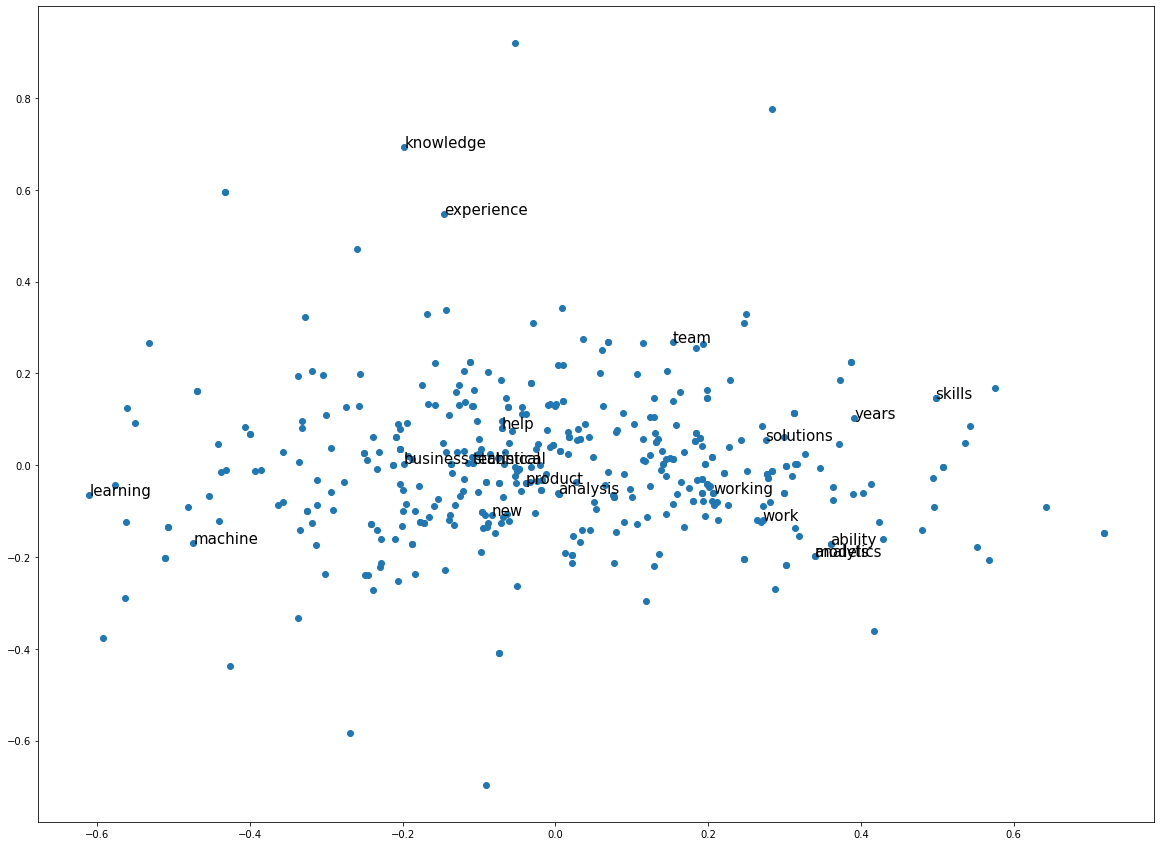

In [100]:
# create a nice big plot 
plt.figure(figsize=(20,15))

# plot the scatter plot of where the words will be
plt.scatter(word_vecs_2d[:,0], word_vecs_2d[:,1])

# for each word and coordinate pair: draw the text on the plot
for word, coord in zip(wc_top20['word'], word_vecs_2d):
    x, y = coord
    plt.text(x, y, word, size= 15)

# show the plot
plt.show()

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 